In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号
import warnings
warnings.filterwarnings("ignore") #关闭一些可能出现但对数据分析并无影响的警告

In [3]:
df = pd.read_csv('./业绩报表(处理后).csv')
df.describe()

,股票代码,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1
count,5484.000000,5484.000000,5.484000e+03,5.484000e+03,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,388139.842815,0.122016,3.180994e+09,2.753574e+08,0.709495,20.635301,39.810318,7.196366,-0.010364,26.271741,-6.553253,115.177624
std,285517.973506,0.380650,2.127731e+10,2.634899e+09,14.335407,290.189122,916.466583,7.532626,1.011458,125.828230,77.487873,1584.449263
min,1.000000,-4.140000,0.000000e+00,-3.803000e+09,-941.730000,-98.062785,-29383.743282,-20.742510,-18.915367,-9160.448279,-99.159700,-54367.182500
25%,2887.750000,0.004000,1.360270e+08,1.519267e+06,0.128500,-14.052682,-45.472500,3.156360,-0.181911,14.119519,-32.955100,-42.776325
50%,301280.500000,0.060000,3.778685e+08,1.935334e+07,1.200000,2.667495,4.755000,5.286974,-0.004722,24.645384,-13.121950,17.064450
75%,603324.500000,0.170000,1.192393e+09,8.083908e+07,2.520000,21.426762,49.400000,8.853095,0.146134,38.410452,3.046700,102.468675
max,900957.000000,16.550000,7.913310e+11,9.016400e+10,61.350000,16136.115852,39646.730000,173.759014,27.270530,100.221280,2298.307200,36581.898000


In [4]:
df['股票代码'] = df['股票代码'].astype(str).str.zfill(6)
df['最新公告日期'] = pd.to_datetime(df['最新公告日期'],format='%Y-%m-%d %H:%M:%S').dt.date
df

,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,000001,平安银行,2023-04-25,0.6500,4.509800e+10,1.460200e+10,3.39,-2.400069,13.60,19.416727,5.624858,0.000000,8.3305,64.8639,0,银行
1,000002,万科A,2023-04-29,0.1251,6.847401e+10,1.445811e+09,0.60,9.266322,1.16,20.620089,0.586830,15.447326,-58.7916,-74.0306,0,房地产开发
2,000004,ST国华,2023-04-29,-0.0559,2.125577e+07,-7.427186e+06,-2.13,88.709844,40.92,2.597512,-0.225304,60.871220,-74.1534,98.6205,0,软件开发
3,000005,ST星源,2023-04-29,-0.0026,2.817181e+07,-2.802013e+06,-0.23,-3.716186,-279.00,1.142891,-0.039592,5.629717,-74.2662,98.3133,0,环保行业
4,000006,深振业A,2023-04-29,-0.0090,2.656401e+08,-1.208588e+07,-0.15,-24.403520,-127.20,5.844291,-0.478643,37.565558,-87.9851,-105.5304,0,房地产开发
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,900947,振华B股,2023-04-29,0.0240,6.019689e+09,1.295373e+08,0.85,26.187585,747.09,2.806308,-0.175318,14.317535,-46.3125,-57.4741,0,通用设备
5480,900948,伊泰B股,2023-04-26,0.9900,1.371778e+10,3.220750e+09,6.28,-8.009549,-1.93,16.297773,0.444897,40.892305,-7.7981,509.4714,0,煤炭行业
5481,900952,锦港B股,2023-04-29,0.0100,8.815364e+08,2.564205e+07,0.38,46.632642,-43.82,3.340131,0.178838,16.978541,-14.1958,-48.9434,0,航运港口
5482,900953,凯马B,2023-04-29,-0.0028,7.410952e+08,-1.765618e+06,-0.41,-25.849172,-209.24,0.668364,0.030578,4.359707,8.5835,97.0013,0,汽车零部件


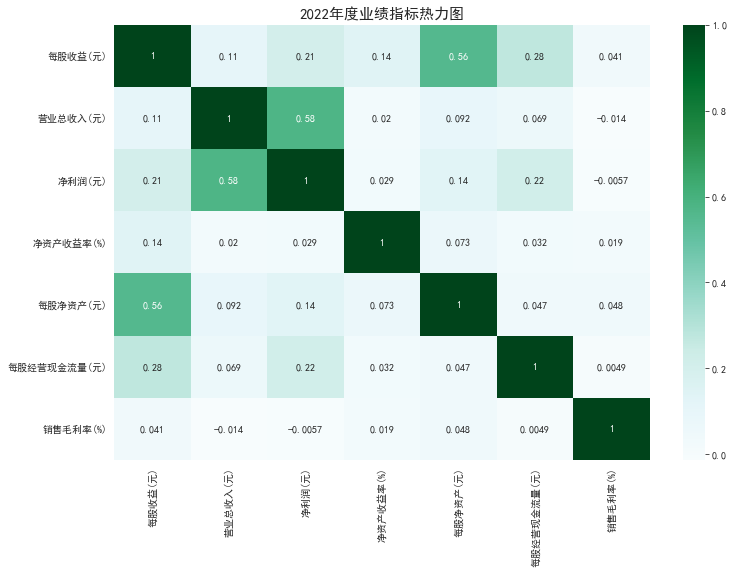

In [86]:
### 1.绘制多个指标的热力图，判断指标之间的相关性
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


interested_columns = ['每股收益(元)', '营业总收入(元)', '净利润(元)', '净资产收益率(%)','每股净资产(元)','每股经营现金流量(元)','销售毛利率(%)']

interested_data = df[interested_columns]

# 计算指标之间的相关系数
correlation_matrix = interested_data.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')
plt.title('2022年度业绩指标热力图',size = 15)
plt.show()


In [87]:
correlation_matrix

,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%)
每股收益(元),1.000000,0.106797,0.206051,0.140667,0.555958,0.275256,0.040699
营业总收入(元),0.106797,1.000000,0.575493,0.019725,0.091888,0.069217,-0.013511
净利润(元),0.206051,0.575493,1.000000,0.029285,0.136925,0.215752,-0.005662
净资产收益率(%),0.140667,0.019725,0.029285,1.000000,0.073338,0.031957,0.019188
每股净资产(元),0.555958,0.091888,0.136925,0.073338,1.000000,0.046884,0.048466
每股经营现金流量(元),0.275256,0.069217,0.215752,0.031957,0.046884,1.000000,0.004852
销售毛利率(%),0.040699,-0.013511,-0.005662,0.019188,0.048466,0.004852,1.000000


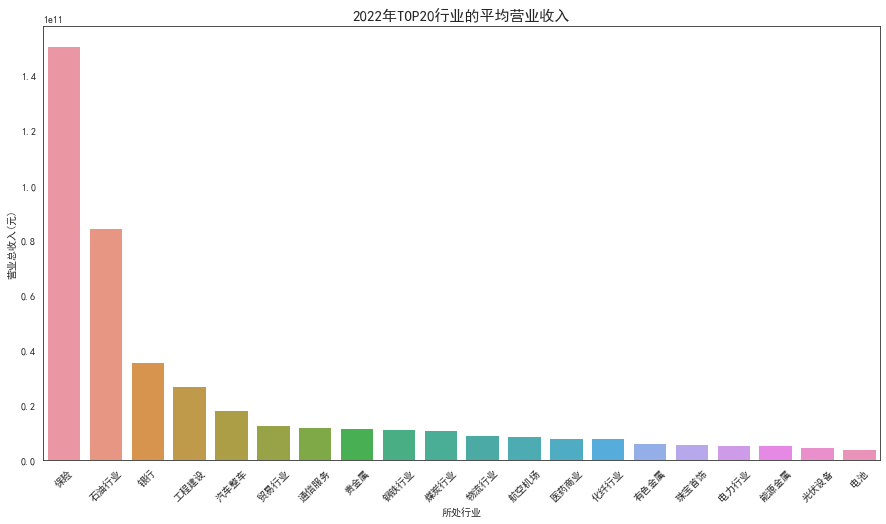

In [88]:
### 2. 绘制不同行业营业收入和净利润的统计情况
# 按行业进行分组，并计算营业总收入的均值
revenue_mean_by_industry = df.groupby('所处行业')['营业总收入(元)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='营业总收入(元)', ascending=False).head(20)

# 绘制柱状图
plt.figure(figsize=(15, 8))
sns.barplot(x='所处行业', y='营业总收入(元)', data=revenue_mean_df)
plt.title('2022年TOP20行业的平均营业收入',size = 15)
plt.xticks(rotation=45,size=10)
plt.show()

In [89]:
revenue_mean_df

,所处行业,营业总收入(元)
7,保险,1.508751e+11
59,石油行业,8.460426e+10
83,银行,3.568107e+10
30,工程建设,2.717929e+10
40,汽车整车,1.835963e+10
73,贸易行业,1.283388e+10
75,通信服务,1.227216e+10
72,贵金属,1.179574e+10
81,钢铁行业,1.145949e+10
45,煤炭行业,1.099037e+10


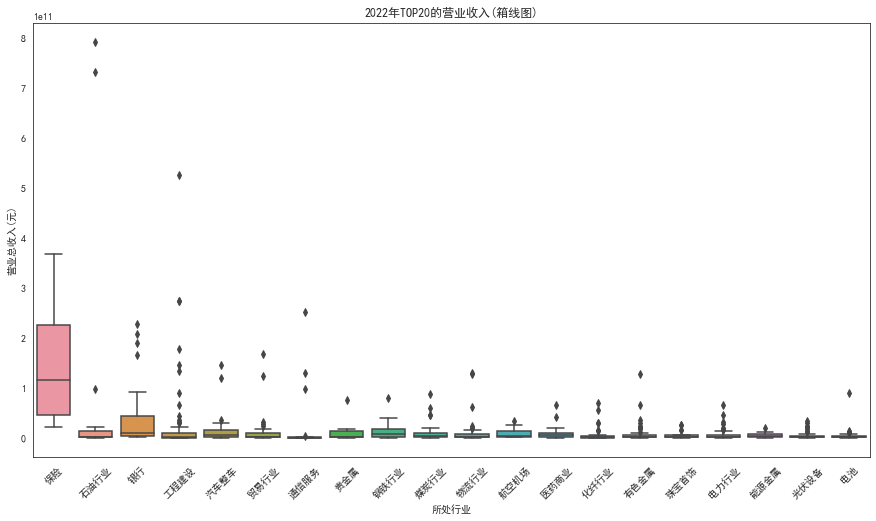

In [90]:
# 按行业进行分组，并计算营业总收入的均值
revenue_mean_by_industry = df.groupby('所处行业')['营业总收入(元)'].mean()

# 将分组结果转换为DataFrame
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='营业总收入(元)', ascending=False).head(20)
# 绘制箱线图
plt.figure(figsize=(15, 8))
sns.boxplot(x='所处行业', y='营业总收入(元)', data=df, order=revenue_mean_df['所处行业'])
plt.title('2022年TOP20的营业收入(箱线图)')
plt.xticks(rotation=45)
plt.show()


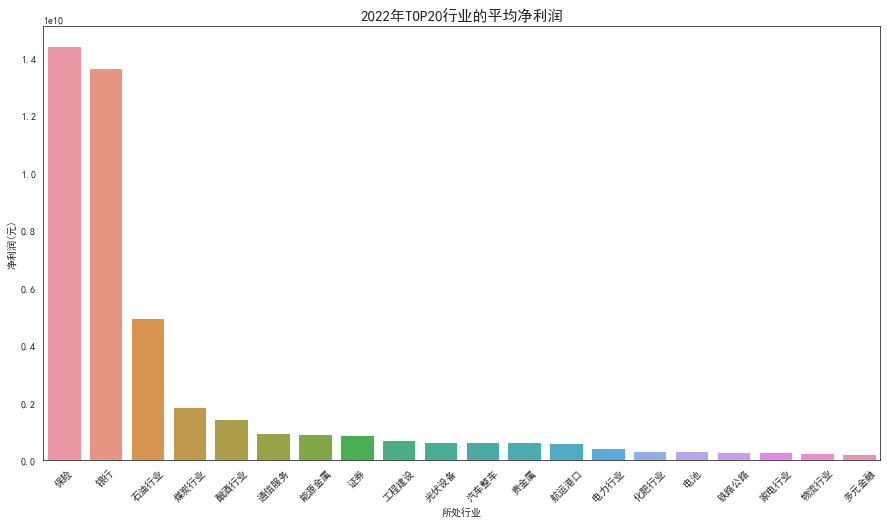

In [91]:
# 按行业进行分组，并计算净利润的均值
revenue_mean_by_industry = df.groupby('所处行业')['净利润(元)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='净利润(元)', ascending=False).head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x='所处行业', y='净利润(元)', data=revenue_mean_df)
plt.title('2022年TOP20行业的平均净利润',size = 15)
plt.xticks(rotation=45,size = 10)
plt.show()

In [92]:
revenue_mean_df

,所处行业,净利润(元)
7,保险,1.442437e+10
83,银行,1.367371e+10
59,石油行业,4.943744e+09
45,煤炭行业,1.853237e+09
79,酿酒行业,1.452984e+09
75,通信服务,9.663639e+08
63,能源金属,9.046373e+08
71,证券,8.890032e+08
30,工程建设,6.998810e+08
8,光伏设备,6.441502e+08


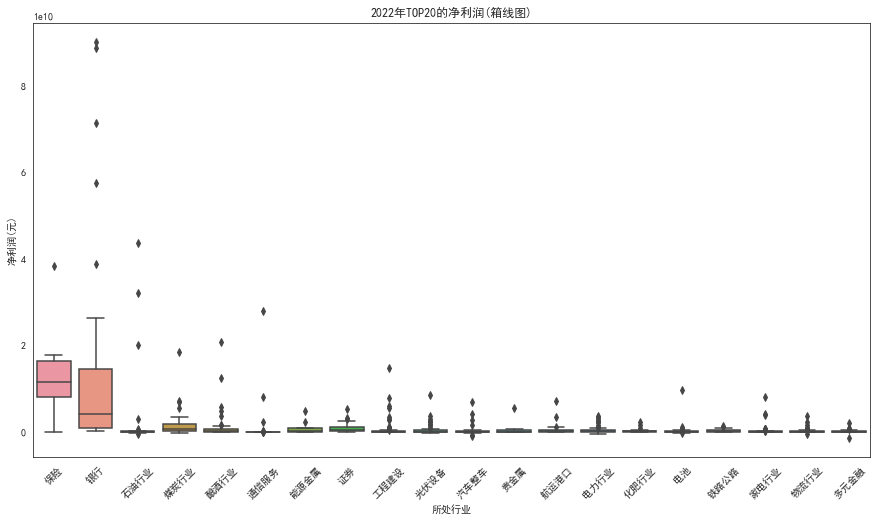

In [93]:
# 按行业进行分组，并计算净利润的均值
revenue_mean_by_industry = df.groupby('所处行业')['净利润(元)'].mean()

# 将分组结果转换为DataFrame
revenue_mean_df = pd.DataFrame(revenue_mean_by_industry).reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='净利润(元)', ascending=False).head(20)
# 绘制箱线图
plt.figure(figsize=(15, 8))
sns.boxplot(x='所处行业', y='净利润(元)', data=df, order=revenue_mean_df['所处行业'])
plt.title('2022年TOP20的净利润(箱线图)')
plt.xticks(rotation=45)
plt.show()


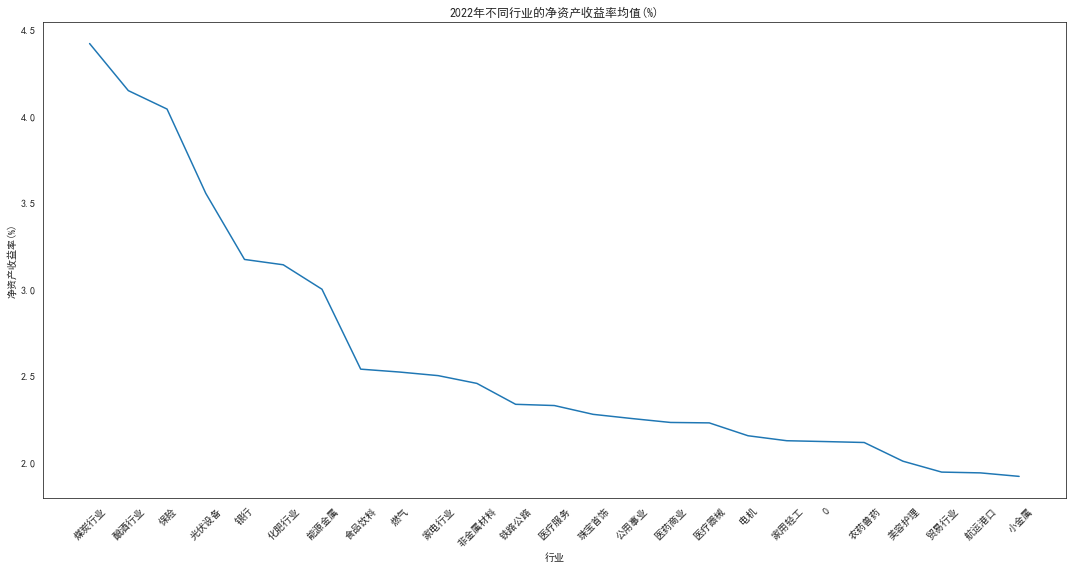

In [94]:
### 3.ROE排名
# 按行业进行分组，并计算净资产收益率的均值
roe_mean_by_industry = df.groupby('所处行业')['净资产收益率(%)'].mean()

# 将分组结果转换为DataFrame，并按降序排列
roe_mean_df = pd.DataFrame(roe_mean_by_industry).reset_index()
roe_mean_df = roe_mean_df.sort_values(by='净资产收益率(%)', ascending=False).head(25)

plt.figure(figsize=(15, 8))
sns.lineplot(x='所处行业', y='净资产收益率(%)', data=roe_mean_df)
plt.title('2022年不同行业的净资产收益率均值(%)')
plt.xlabel('行业')
plt.ylabel('净资产收益率(%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [95]:
roe_mean_df

,所处行业,净资产收益率(%)
45,煤炭行业,4.422392
79,酿酒行业,4.150113
7,保险,4.043333
8,光伏设备,3.555935
83,银行,3.173452
18,化肥行业,3.142625
63,能源金属,3.001182
86,食品饮料,2.538830
46,燃气,2.522187
27,家电行业,2.501383


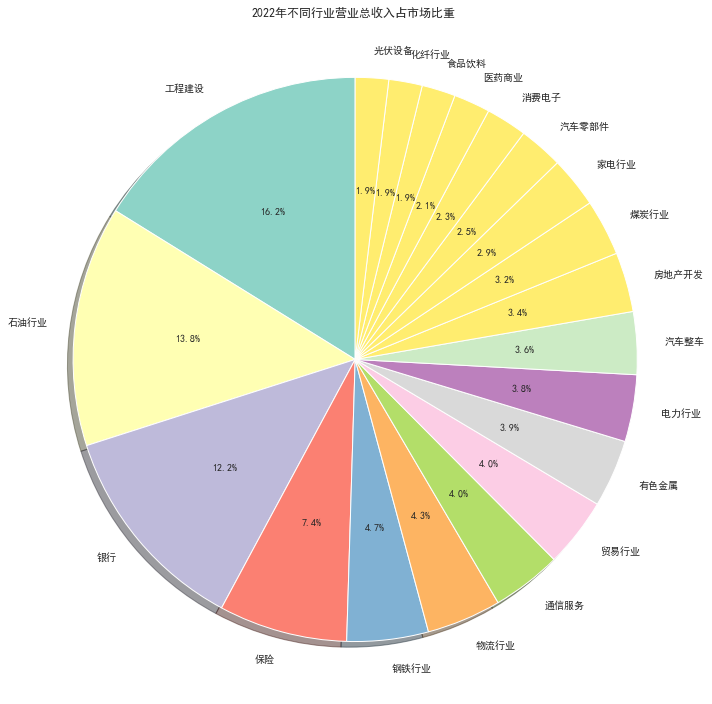

In [103]:
### 4.饼图展示不同行业的营业总收入占比
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'
revenue_sum_by_industry = df.groupby('所处行业')['营业总收入(元)'].sum()
top_20_industries = revenue_sum_by_industry.sort_values(ascending=False).head(20)

# 绘制饼图
plt.figure(figsize=(10, 10))
colors = plt.cm.Set3(range(len(top_20_industries)))
plt.pie(top_20_industries, labels=top_20_industries.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('2022年不同行业营业总收入占市场比重')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [104]:
top_20_industries

所处行业
工程建设     1.984088e+12
石油行业     1.692085e+12
银行       1.498605e+12
保险       9.052506e+11
钢铁行业     5.729745e+11
物流行业     5.243878e+11
通信服务     4.908862e+11
贸易行业     4.876873e+11
有色金属     4.759006e+11
电力行业     4.705170e+11
汽车整车     4.406312e+11
房地产开发    4.195953e+11
煤炭行业     3.956534e+11
家电行业     3.580951e+11
汽车零部件    3.107079e+11
消费电子     2.882891e+11
医药商业     2.567354e+11
食品饮料     2.365670e+11
化纤行业     2.351355e+11
光伏设备     2.341779e+11
Name: 营业总收入(元), dtype: float64

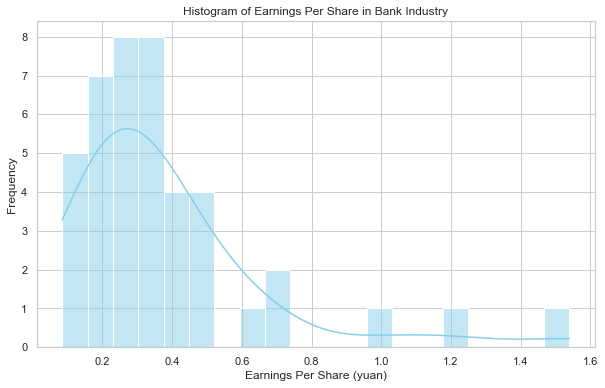

In [109]:
### 5.直方图观察指标分布情况
# 选择单一行业（例如银行）的每股收益数据
industry = '银行'
earnings_per_share = df[df['所处行业'] == industry]['每股收益(元)']

sns.set(style='whitegrid')

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(earnings_per_share, bins=20, kde=True, color='skyblue')
plt.xlabel('Earnings Per Share (yuan)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Earnings Per Share in Bank Industry')

plt.show()

In [110]:
earnings_per_share

0       0.6500
462     0.0844
662     1.0000
1295    0.1428
1325    0.2300
1414    0.1400
1425    0.1600
1434    0.1600
1441    0.3200
2872    0.5100
2881    0.3100
2882    0.3300
2900    1.5400
3602    0.2500
3607    0.5100
3609    0.6700
3611    0.1500
3665    0.5200
3685    0.3500
3704    0.2900
3715    1.2100
3717    0.3500
3721    0.2500
3735    0.4300
3742    0.2000
3748    0.3300
3761    0.2500
3769    0.2300
3774    0.4900
3794    0.2700
3795    0.2000
3825    0.1900
3826    0.3600
3829    0.6800
3832    0.1100
3851    0.2600
3858    0.3500
3863    0.4300
3870    0.1900
3877    0.4400
3878    0.3900
4111    0.2000
Name: 每股收益(元), dtype: float64

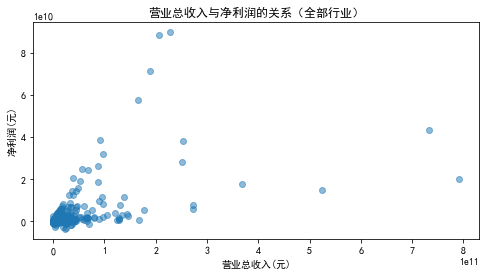

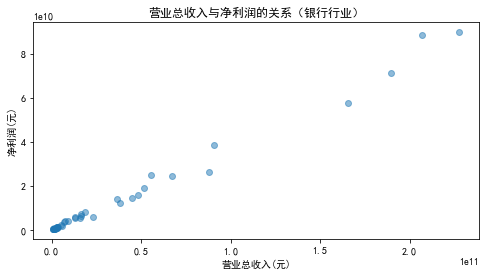

In [13]:
###
import matplotlib.pyplot as plt

# 整个数据集的散点图
plt.figure(figsize=(8, 4))
plt.scatter(df['营业总收入(元)'], df['净利润(元)'], alpha=0.5)
plt.xlabel('营业总收入(元)')
plt.ylabel('净利润(元)')
plt.title('营业总收入与净利润的关系（全部行业）')
plt.show()

# 银行行业的散点图
bank_data = df[df['所处行业'] == '银行']
plt.figure(figsize=(8, 4))
plt.scatter(bank_data['营业总收入(元)'], bank_data['净利润(元)'], alpha=0.5)
plt.xlabel('营业总收入(元)')
plt.ylabel('净利润(元)')
plt.title('营业总收入与净利润的关系（银行行业）')
plt.show()


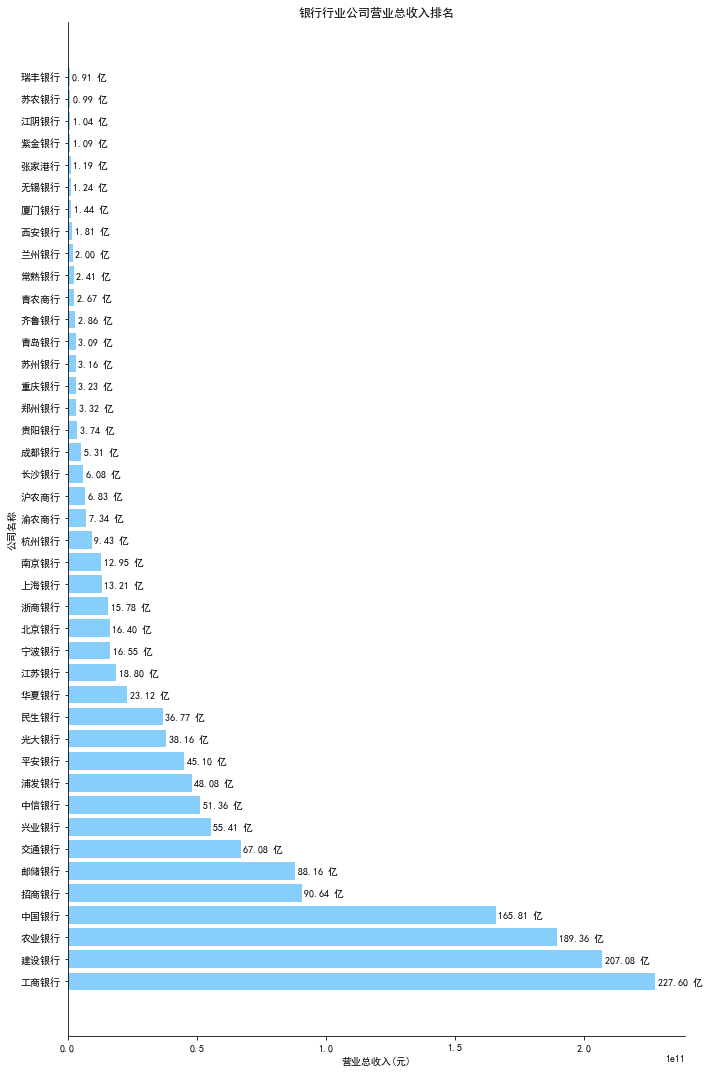

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择所处行业为银行的公司
bank_df = df[df['所处行业'] == '银行']

# 按营业总收入降序排列
sorted_df = bank_df.sort_values('营业总收入(元)', ascending=False)

# 设置绘图参数
plt.figure(figsize=(10, 15))
plt.barh(sorted_df['股票简称'], sorted_df['营业总收入(元)'], color='#87CEFA')
plt.xlabel('营业总收入(元)')
plt.ylabel('公司名称')
plt.title('银行行业公司营业总收入排名')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, v in enumerate(sorted_df['营业总收入(元)']):
    plt.text(v + 1e9, i, f'{v/1e9:.2f} 亿', va='center', fontsize=10)

plt.tight_layout()
plt.show()


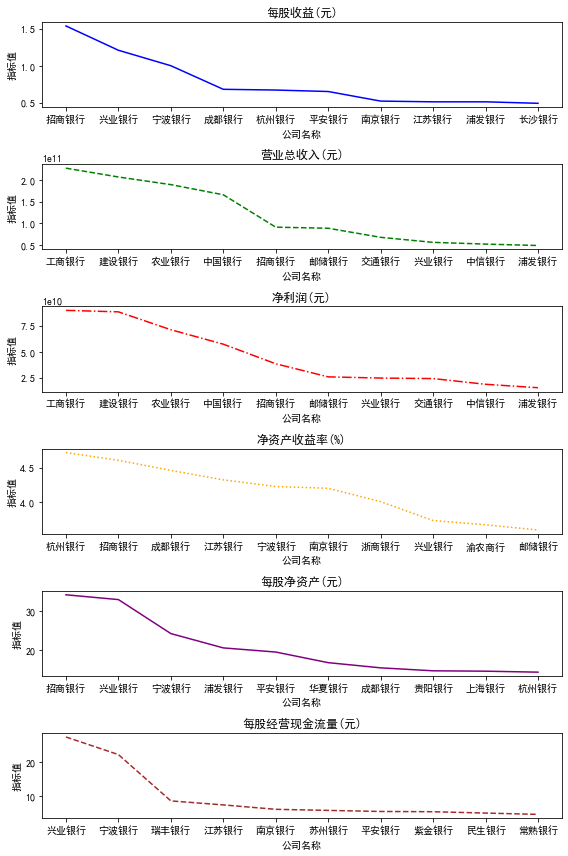

In [10]:
bank_data = df[df['所处行业'] == '银行']
# 提取需要绘制的指标列
indicators = ['每股收益(元)', '营业总收入(元)', '净利润(元)', '净资产收益率(%)', '每股净资产(元)', '每股经营现金流量(元)']
fig, axes = plt.subplots(nrows=len(indicators), ncols=1, figsize=(8, 12))
line_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']
line_styles = ['-', '--', '-.', ':', '-', '--']
for i, ax in enumerate(axes):
    col_name = indicators[i]
    data = bank_data.sort_values(col_name, ascending=False)[col_name][:10]
    x = bank_data.sort_values(col_name, ascending=False)['股票简称'][:10]
    ax.plot(x, data, color=line_colors[i], linestyle=line_styles[i])
    ax.set_title(col_name)
    ax.set_xlabel('公司名称')
    ax.set_ylabel('指标值')

plt.tight_layout()

plt.show()


In [297]:
## 7. 聚类分析（聚类公司，并使用所处行业进行准确率检验）
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 提取需要进行聚类分析的特征列
features = df.drop(['股票代码', '股票简称', '最新公告日期', '所处行业'], axis=1)

# 将所有字符串数据转换为0
features = features.replace(to_replace=r'^.*$', value=0, regex=True)

# 处理缺失值
features.fillna(0, inplace=True)

# 标准化处理
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用簇数为50进行聚类
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# 添加聚类结果到数据中
df['聚类结果'] = labels

# 创建实际行业和聚类结果的对应字典
industry_mapping = {industry: i for i, industry in enumerate(df['所处行业'].unique())}
predicted_mapping = {i: industry for industry, i in industry_mapping.items()}

# 计算准确率
df['实际行业编码'] = df['所处行业'].map(industry_mapping)
accuracy = accuracy_score(df['实际行业编码'], df['聚类结果'])
print(f"准确率: {accuracy}")

# 输出部分样本的实际行业和聚类结果
sample_results = df[['股票简称', '所处行业', '聚类结果']].head(50)
sample_results.columns = ['股票简称', '实际行业', '聚类结果']
print(sample_results)


准确率: 0.031181619256017507
     股票简称   实际行业  聚类结果
0    平安银行     银行     3
1     万科A  房地产开发    25
2    ST国华   软件开发     7
3    ST星源   环保行业     7
4    深振业A  房地产开发     7
5   *ST全新  房地产服务     0
6    神州高铁   交运设备     7
7    中国宝安   综合行业    28
8    美丽生态   工程建设     0
9    深物业A  房地产开发     7
10    南玻A   玻璃玻纤    28
11   沙河股份  房地产开发    45
12   深康佳A   家电行业    28
13   深中华A   交运设备     7
14   深粮控股   贸易行业    28
15   深华发A  光学光电子    28
16    深科技   消费电子    28
17   ST深天   水泥建材     7
18    特力A   汽车服务     0
19    飞亚达   珠宝首饰    21
20   深圳能源   电力行业    28
21   国药一致   医药商业    22
22   深深房A  房地产开发    28
23   富奥股份  汽车零部件    28
24    大悦城  房地产开发     7
25   深桑达A   通信设备    34
26   神州数码  计算机设备    21
27   中国天楹   环保行业     7
28   华联控股  房地产开发     7
29   深南电A   电力行业     7
30   中集集团   通用设备    21
31   东旭蓝天   电力行业     0
32   中洲控股  房地产开发     0
33   深纺织A  光学光电子    28
34  *ST泛海   多元金融     7
35   京基智农  房地产开发    44
36   德赛电池     电池    45
37   深天马A  光学光电子    28
38   方大集团   装修装饰    28
39   皇庭国际  房地产服务    28
40    深赛格   商业百货    28
41   华锦股